# Actividad

Utiliza un modelo de regresión lineal múltiple para predecir el salario en dolares (salary_in_usd) de cada empleado. Las variables regresoras de tu modelo deben de ser las siguientes: nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio).

Entrega un documento en formato PDF donde se observe la siguiente información.

1.-Ecuación matemática que describe el modelo de regresión lineal a ejecutar. Se debe especificar el nombre de las variables.

2.- Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

3.-Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

4.- Calculo de R^2, calculo de los coeficientes de regresión y p-valor; interpretación de resultados.

5.-Comparación entre datos reales y predicción. Análisis de los resultados.

6.-Análisis de los errores mediante diferentes medios (QQ-plot, histograma, test Kolmogorov etc.). Mostrar las gráficas correspondientes y el análisis de resultados

El trabajo se realizará de forma individual. La forma de entrega será mediante un documento PDF en canvas.

El documento debe de tener como pie de página tu nombre con tu matrícula

Es una actividad de puntos extra, si deseas que te cuente para la calificación la debes entregar antes de la fecha solicitada.

## Importamos las librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/ds_salaries.csv')

## Analizamos los datos
- El tamaño de la tabla
- Los nombres de las columnas
- Deteccion de valores nulos
- Deteccion y eliminacion de columnas no necesarias para la regresion lineal

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 12)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('job_title', axis = 1, inplace = True)
df.drop('salary_currency', axis = 1, inplace = True)
df.drop('employee_residence', axis = 1, inplace = True)
df.drop('company_location', axis = 1, inplace = True)
df.drop('company_size', axis = 1, inplace = True)
df.drop('work_year', axis = 1, inplace = True)

In [ ]:
df.head()

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50


## Creamos variables dummies
- Encontramos las variables categoricas y las sustituimos con valores numericos equivalentes.

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

- Generamos los arreglos de las variables dummies.

In [ ]:
dummies_employ = pd.get_dummies(df['employment_type'], prefix = 'employment_type')

In [ ]:
dummies_employ

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


In [ ]:
dummies_exp = pd.get_dummies(df['experience_level'], prefix = 'experience_level')

In [ ]:
dummies_exp

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


- Concatenamos los arreglos de las variables dummies con el dataframe principal.

In [ ]:
df = pd.concat([df, dummies_employ], axis = 1)

df = pd.concat([df, dummies_exp], axis = 1)

df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,1,0,0,0,0,1
2,SE,FT,85000,109024,50,0,0,1,0,0,0,0,1
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,SE,FT,154000,154000,100,0,0,1,0,0,0,0,1
603,SE,FT,126000,126000,100,0,0,1,0,0,0,0,1
604,SE,FT,129000,129000,0,0,0,1,0,0,0,0,1
605,SE,FT,150000,150000,100,0,0,1,0,0,0,0,1


- Eliminamos las columnas en las que se basan las variables dummies.

In [ ]:
df.drop('experience_level', axis = 1, inplace = True)

df.drop('employment_type', axis = 1, inplace = True)

## Empezamos con el modelo de regresion lineal
- Primero buscamos la correlación entre variables.


In [ ]:
corr = df.corr()

corr

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
salary,1.000000,-0.083906,-0.014608,-0.008268,-0.014568,0.025685,-0.020006,-0.015845,0.014130,0.074626,-0.065995
salary_in_usd,-0.083906,1.000000,0.132122,0.092907,-0.073863,0.091819,-0.144627,-0.294196,0.259866,-0.252024,0.343513
remote_ratio,-0.014608,0.132122,1.000000,0.065149,-0.016865,-0.023834,-0.002935,-0.010490,0.041208,-0.127850,0.113071
employment_type_CT,-0.008268,0.092907,0.065149,1.000000,-0.007423,-0.506989,-0.011795,0.066013,0.070739,-0.028817,-0.047768
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.007423,1.000000,-0.453089,-0.010541,-0.033537,-0.017229,0.068108,-0.034520
employment_type_FT,0.025685,0.091819,-0.023834,-0.506989,-0.453089,1.000000,-0.719987,-0.167828,-0.008698,-0.006597,0.128381
employment_type_PT,-0.020006,-0.144627,-0.002935,-0.011795,-0.010541,-0.719987,1.000000,0.204028,-0.027379,-0.013805,-0.119762
experience_level_EN,-0.015845,-0.294196,-0.010490,0.066013,-0.033537,-0.167828,0.204028,1.000000,-0.087108,-0.302761,-0.381033
experience_level_EX,0.014130,0.259866,0.041208,0.070739,-0.017229,-0.008698,-0.027379,-0.087108,1.000000,-0.155539,-0.195751
experience_level_MI,0.074626,-0.252024,-0.127850,-0.028817,0.068108,-0.006597,-0.013805,-0.302761,-0.155539,1.000000,-0.680373


- La siguiente linea nos generará un arreglo con las variables que se encuentran altamente correlacionadas, especificamente, con una correlación mayor a 0.95 y menor a 1.

In [ ]:
alta_corr = np.where((corr > 0.95) & (corr < 1))

alta_corr

(array([], dtype=int64), array([], dtype=int64))

- La siguiente linea nos generará un arreglo con las variables que se encuentran altamente correlacionadas de manera negativa, especificamente, con una correlación menor a -0.95 y mayor a -1.

In [ ]:
baja_corr = np.where((corr < -0.95) & (corr > -1))

baja_corr

(array([], dtype=int64), array([], dtype=int64))

- Como podemos observar, no tenemos variables altamente correlacionadas, ya sea positivamente o negativamente. Lo cual es bueno, significa que no tenemos que eliminar variables.

- A continuación estandarizamos el dataframe.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_estandar = scaler.fit_transform(df)

df_estandar

array([[-0.16460538, -0.45790445, -1.74361532, ..., -0.21154298,
         1.36006076, -0.9253481 ],
       [-0.0414754 ,  2.08328151, -1.74361532, ..., -0.21154298,
        -0.73526127,  1.08067439],
       [-0.15488459, -0.04617667, -0.51437665, ..., -0.21154298,
        -0.73526127,  1.08067439],
       ...,
       [-0.12637028,  0.2355771 , -1.74361532, ..., -0.21154298,
        -0.73526127,  1.08067439],
       [-0.11276118,  0.53177399,  0.71486203, ..., -0.21154298,
        -0.73526127,  1.08067439],
       [-0.08035855,  1.23700468,  0.71486203, ..., -0.21154298,
         1.36006076, -0.9253481 ]])

- Pero aun no es un dataframe, es un arreglo. Así que lo modelamos como dataframe.

In [ ]:
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)

df_estandar

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,-0.164605,-0.457904,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
1,-0.041475,2.083282,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
2,-0.154885,-0.046177,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
3,-0.197008,-1.301826,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
4,-0.112761,0.531774,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
...,...,...,...,...,...,...,...,...,...,...,...
602,-0.110169,0.588192,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
603,-0.128314,0.193263,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
604,-0.126370,0.235577,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
605,-0.112761,0.531774,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674


### Entrenamiento
- A continuación, empezamos a entrenar el modelo.

In [ ]:
from sklearn.model_selection import train_test_split

entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)

entrenamiento

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
9,-0.128962,0.179159,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
227,-0.161365,-0.333488,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
591,-0.116096,0.459192,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
516,-0.111141,0.567036,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
132,-0.185084,-1.042301,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.185991,-0.988746,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
106,-0.057677,1.059879,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
270,-0.162985,-0.561334,0.714862,-0.091135,-0.081446,0.179758,-0.129423,2.428524,-0.211543,-0.735261,-0.925348
435,-0.164605,-0.291738,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348


In [ ]:
df.columns

Index(['salary', 'salary_in_usd', 'remote_ratio', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE'],
      dtype='object')

- Calculamos el modelo de regresion lineal con los datos de entrenamiento.

In [ ]:
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+employment_type_CT+employment_type_FL+employment_type_FT+experience_level_EN+experience_level_EX+experience_level_MI', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        03:15:41   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1272.
Df Residuals:                     476   BIC:                             1310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0167    

Si vemos nuestro valor de $r^2$ *(R-squared)*, nos daremos cuenta que el valor no es muy bueno, ya que tiene que estar lo mas cercano a 1, por lo tanto, es posible que podamos mejorar ese valor al quitar las variables que su valor $β$ *(coef)* es igual a cero, y esto se sabe por medio del p-valor, que en los datos se expresa como $P>|t|$, si el p-valor es menor o igual a 0.05, se rechaza la hipotesis nula, que dice que $β = 0$, así que conservamos el coeficiente.

In [ ]:
modelo = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+employment_type_CT+employment_type_FT+experience_level_EN+experience_level_EX+experience_level_MI', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     24.47
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.63e-28
Time:                        03:15:41   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1270.
Df Residuals:                     477   BIC:                             1304.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0168    

Como podemos observar, no cambió nada el valor de $r^2$, pero el p-valor de una de las variables ahora es mayor a 0.05, por lo que volvemos a hacer el modelo sin esa variable.

In [ ]:
modelo = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+employment_type_CT+experience_level_EN+experience_level_EX+experience_level_MI', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     27.91
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.33e-28
Time:                        03:15:41   Log-Likelihood:                -628.64
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     478   BIC:                             1301.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0183    

Como podemos observar, ahora sí que cambió el valor de $r^2$, pero disminuyó, así que nos quedamos con el segundo modelo porque siempre preferimos tener un modelo con el mayor valor de $r^2$ posible y la ecuacion más simple (con menos variables), que uno más complejo.

Así que nuestra ecuación de predicción de $y$ sería así:
$y = 0 - 0.1455x1 + 0.0591x2 + 0.0990x3 + 0x4 - 0.3713x5 + 0.1903x6 - 0.3225x7$

In [ ]:
y_aprox = 0 - 0.1455*prueba['salary'] + 0.0591*prueba['remote_ratio'] + 0.0990*prueba['employment_type_CT'] + 0 - 0.3713*prueba['experience_level_EN'] +  0.1903*prueba['experience_level_EX'] - 0.3225*prueba['experience_level_MI']

y_aprox

563    0.400308
289    0.400803
76    -0.271638
78     0.807652
182   -0.409579
         ...   
249    0.397503
365    0.400464
453   -0.273524
548    0.404193
235   -0.417877
Length: 122, dtype: float64

- Creamos una tabla para comparar las predicciones con los datos reales y así medir tambien su nivel de error.

In [ ]:
tabla = pd.DataFrame({'Real' : prueba['salary_in_usd'], 'Prediccion' : y_aprox, 'Errores' : prueba['salary_in_usd']-y_aprox})

tabla

,Real,Prediccion,Errores
563,0.394254,0.400308,-0.006054
289,0.320205,0.400803,-0.080599
76,-0.173457,-0.271638,0.098181
78,2.224328,0.807652,1.416676
182,-1.217128,-0.409579,-0.807549
...,...,...,...
249,0.813866,0.397503,0.416363
365,0.370981,0.400464,-0.029483
453,0.108636,-0.273524,0.382159
548,-0.186856,0.404193,-0.591049


### Graficación


Text(0, 0.5, 'Prediccion')

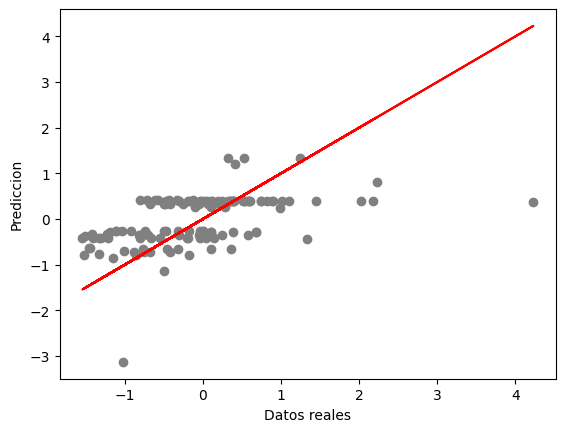

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(prueba['salary_in_usd'], y_aprox, color = 'gray')

plt.plot(prueba['salary_in_usd'], prueba['salary_in_usd'], color = 'red')

plt.xlabel("Datos reales")

plt.ylabel("Prediccion")

En base a esta grafica de puntos y comparandola con la linea recta, nos podemos dar cuenta que nuestra prediccion y los datos reales no son muy lineales. Lo cual es una señal de que nuestro modelo no es muy bueno.

In [ ]:
l_residuos = len(tabla['Errores'])

Text(0, 0.5, 'valor del residuo')

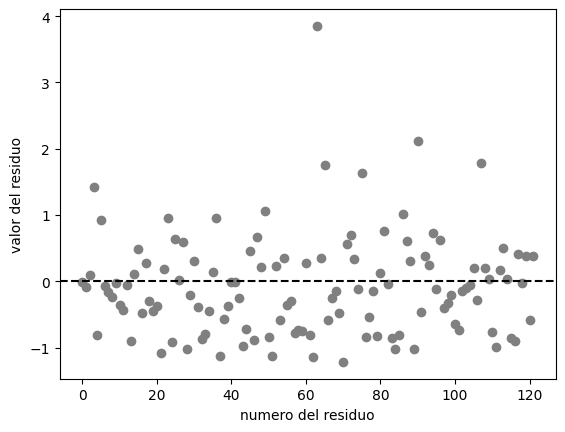

In [ ]:
plt.scatter(range(l_residuos), tabla['Errores'], color = 'gray')
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.xlabel("numero del residuo")
plt.ylabel("valor del residuo")

Podemos notar que nuestros valores de error se encuentran algo dispersos y algunos bastante lejos del cero.

Text(0, 0.5, 'Frecuencia (proba)')

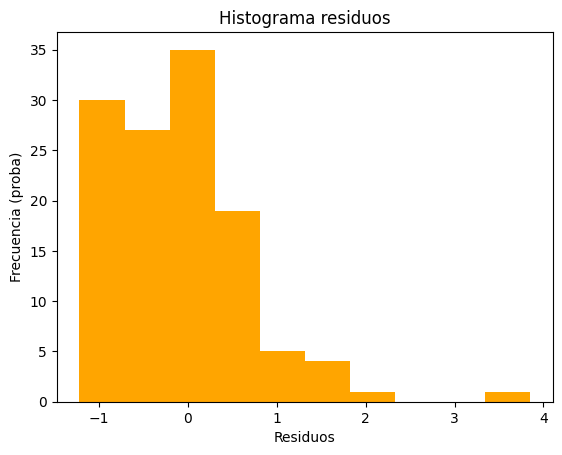

In [ ]:
plt.hist(x = tabla['Errores'], color = 'orange')
plt.title("Histograma residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (proba)")

En este histograma podemos observar que no es exactamente una distribucion normal estandar. De hecho, se parece más a una distribución asimetrica positiva, aun así puede que sí sea una distribución normal y a continuación haremos una prueba para verificar su normalidad.

In [ ]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
errores_est = (tabla['Errores'] - media)/std

In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(errores_est, 'norm')

KstestResult(statistic=0.07811199222152843, pvalue=0.42455282141846074, statistic_location=0.5982597821639776, statistic_sign=1)

Por medio de la prueba de Kolmogorov Smirnov, analizamos el p-valor que si es mayor a 0.05, se puede concluir que la distribución es normal, en caso de que sea menor a 0.05, se conluye que la distribución no es normal. En nuestro caso, el p-valor es 0.4255, por lo que la prueba nos dice que los datos están distribuidos de manera normal.

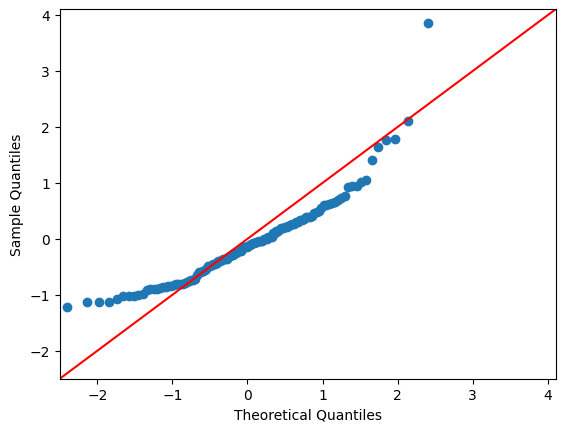

In [ ]:
QQ = sm.qqplot(tabla['Errores'], stats.norm, line = '45')

Graficamos los cuartiles teoricos y los cuartiles empiricos y nos damos cuenta que mantienen cierta relación lineal.

## Conclusiones
Resumiendo la evidencia:
- $r^2 = 0.264$, que nos indica la veracidad del modelo, teniendo a 1 como el mayor nivel de veracidad y a 0 como el menor nivel de veracidad.
- La falta de linealidad de los datos reales con las predicciones.
- La dispersión algo alta de los errores en comparación al cero.
- El histograma de residuos nos indica que la distribución podría ser normal.
- La prueba de Kolmogorov Smirnov nos indica que efectivamente es una distribución normal de los datos.
- La grafica QQ-Plot nos indica que los cuartiles teoricos y empiricos sí mantienen una relación lineal.

Podemos inferir con todos estos datos que el modelo de regresión lineal con nuestro dataset no es el mejor modelo que podríamos usar. Sobre todo por su baja veracidad, no es un modelo confiable.


# Credito:
- A00227694
- Siddhatha López Valenzuela